In [240]:
from nilearn import image, plotting
from pathlib import Path

bids_folder = Path('/data/ds-siemenspilots')
bids_folder1 = Path('/data/ds-siemenspilotsfmap')
bids_folder2 = Path('/data/ds-siemenspilots24')

In [241]:
im1 = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-LR_run-01_bold.nii.gz'
im2 = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb2_dir-LR_run-05_bold.nii.gz'
im3 = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb4_dir-LR_run-03_bold.nii.gz'

im4 = bids_folder / 'sub-philips' / 'ses-1' / 'func' / 'sub-philips_ses-1_task-task_run-1_bold.nii'

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/2631626832.py:11: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  img4_cropped = image.crop_img(img4)
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/image/resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/image/resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/image/resampling.py:867: UserWarning: Casting data from int32 to float32
  return resample_img(


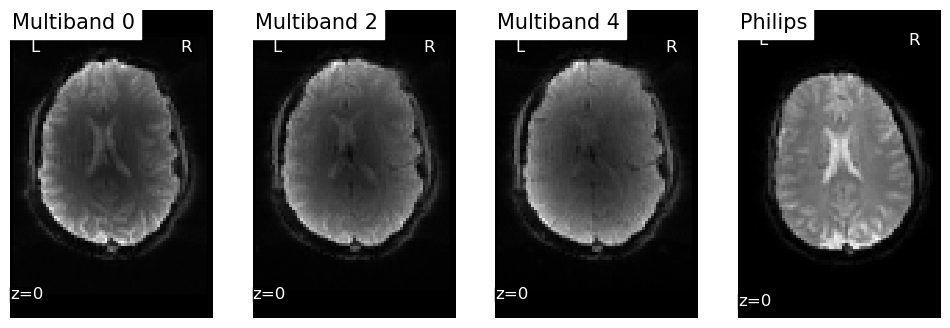

In [54]:
import matplotlib.pyplot as plt
from nilearn import image, plotting

# Load the first volume (index 0) of each NIfTI image
img1 = image.index_img(im1, 0)
img2 = image.index_img(im2, 0)
img3 = image.index_img(im3, 0)
img4 = image.index_img(im4, 0)

# Crop only img4 to remove unnecessary margins
img4_cropped = image.crop_img(img4)

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Define titles for each subplot
titles = ['Multiband 0', 'Multiband 2', 'Multiband 4', 'Philips']

# Plot each image in a different subplot
for ax, img, title in zip(axes, [img1, img2, img3, img4_cropped], titles):
    display = plotting.plot_img(img, cmap='gray', display_mode='z', cut_coords=[0], title=title, axes=ax, black_bg=True)
    # display.annotate(size=8)

# Adjust layout to remove excess whitespace
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1)

# plt.show()


In [55]:
def get_tsnr(func_img):
     return image.math_img("img.mean(axis=-1) / img.std(axis=-1)", img=func_img)

<string>:1: RuntimeWarning: invalid value encountered in divide
<string>:1: RuntimeWarning: invalid value encountered in divide
<string>:1: RuntimeWarning: invalid value encountered in divide
<string>:1: RuntimeWarning: invalid value encountered in divide
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/4190731573.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:232: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = safe_get_data(img, ensure_finite=True)
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:232: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = sa

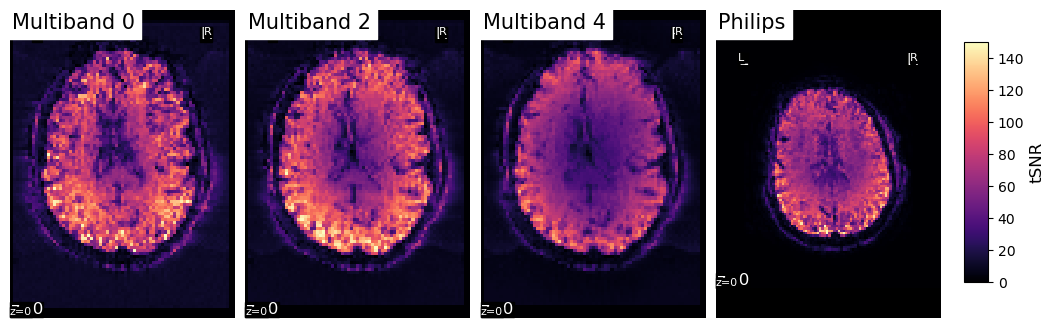

In [71]:
import matplotlib.pyplot as plt
from nilearn import image, plotting
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# Compute tSNR and crop images
tsnrs = [get_tsnr(im) for im in [im1, im2, im3, im4]]

# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw={'wspace': 0.05})  # Reduce spacing



# Define titles
titles = ['Multiband 0', 'Multiband 2', 'Multiband 4', 'Philips']

# Define a colormap and normalization for the colorbar
cmap = cm.get_cmap('magma')
norm = colors.Normalize(vmin=0, vmax=150)

# tsnrs[3] = image.crop_img(tsnrs[3])

# Plot each image **without individual colorbars**
for ax, tsnr, title in zip(axes, tsnrs, titles):
    display = plotting.plot_img(tsnr, cmap=cmap, display_mode='z', cut_coords=[0], 
                                title=title, axes=ax, black_bg=True, vmin=0, vmax=150, colorbar=False)
    display.annotate(size=8)

# Add a single colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position of colorbar (adjust as needed)
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label("tSNR", fontsize=12)


In [67]:
print(f"Type of tsnrs[3]: {type(tsnrs[3])}")
print(f"Shape of tsnrs[3]: {tsnrs[3].shape}")
print(f"Affine of tsnrs[3]:\n{tsnrs[3].affine}")


Type of tsnrs[3]: <class 'nibabel.nifti1.Nifti1Image'>
Shape of tsnrs[3]: (96, 96, 39)
Affine of tsnrs[3]:
[[ -2.5          0.           0.         120.        ]
 [  0.          -2.34923148  -1.02606046 132.77128601]
 [  0.          -0.85505038   2.81907797 -13.92960072]
 [  0.           0.           0.           1.        ]]


In [69]:
from nilearn.image import _crop_img_to

# Check what crop_img is computing
cropped_bounds = _crop_img_to(tsnrs[3], rtol=1e-5)
print(f"Cropped bounds: {cropped_bounds}")

# Now apply cropping
tsnrs[3] = image.crop_img(tsnrs[3])

ImportError: cannot import name '_crop_img_to' from 'nilearn.image' (/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/image/__init__.py)

In [60]:
tsnrs[3] = image.new_img_like(tsnrs[3], tsnrs[3].get_fdata())  # Ensure NIfTI format
tsnrs[3] = image.crop_img(tsnrs[3])  # Now crop


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/803004258.py:2: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  tsnrs[3] = image.crop_img(tsnrs[3])  # Now crop


TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
from nilearn import image

# Load the functional image (4D)
func_img = image.load_img('func.nii.gz')

# Compute tSNR: Mean over time divided by standard deviation over time
tsnr_img = image.math_img("img.mean(axis=-1) / img.std(axis=-1)", img=func_img)

# Plot the tSNR image
plotting.plot_img(tsnr_img, cmap='magma', colorbar=True, title="tSNR Map")


In [109]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from nilearn.plotting import plot_stat_map

def animate_nifti_switch(img1, img2, slice_idx, output_path="animation.gif", fps=2, interval=500,
                         vmin=0, vmax=800):
    """
    Creates an animation that alternates between two NIfTI images at a given slice index.

    Parameters:
    - img_path1: str, path to the first NIfTI image
    - img_path2: str, path to the second NIfTI image
    - slice_idx: int, slice index to visualize
    - output_path: str, output filename (supports .gif or .mp4)
    - fps: int, frames per second for saving the animation
    - interval: int, time (ms) between frames in the animation
    """
    # Load NIfTI images
    # img1 = nib.load(img_path1)
    # img2 = nib.load(img_path2)

    # Create figure
    fig, ax = plt.subplots(figsize=(6, 6))

    if not isinstance(slice_idx, list):
        slice_idx = [slice_idx]

    # Update function for animation
    def update(frame):
        ax.clear()
        img = img1 if frame % 2 == 0 else img2  # Switch between images

        plotting.plot_img(
            img, cut_coords=slice_idx, display_mode="z",
            figure=fig, axes=ax, cmap="gray",
            annotate=False, black_bg=True,
            vmin=vmin, vmax=vmax,
        )

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=20, interval=interval, blit=False)

    if output_path:
        # Save animation
        if output_path.endswith(".gif"):
            ani.save(output_path, writer="pillow", fps=fps)
        elif output_path.endswith(".mp4"):
            ani.save(output_path, writer="ffmpeg", fps=fps)
        else:
            raise ValueError("Output format not supported. Use .gif or .mp4")

    return HTML(ani.to_jshtml())

# Example Usage:
# animate_nifti_switch("image1.nii.gz", "image2.nii.gz", slice_idx=40)
from IPython.display import HTML

# im1lr = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-LR_run-01_bold.nii.gz'
# im2rl = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-RL_run-04_bold.nii.gz'
# animate_nifti_switch(image.mean_img(im1lr), image.mean_img(im2rl), slice_idx=0, fps=2, interval=500, output_path='mb0.mp4')




In [ ]:
im3lr = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb2_dir-RL_run-02_bold.nii.gz'
im4rl = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb2_dir-LR_run-05_bold.nii.gz'
animate_nifti_switch(image.mean_img(im3lr), image.mean_img(im4rl), slice_idx=0, fps=2, interval=500, output_path='mb2.mp4')

im5lr = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb4_dir-LR_run-03_bold.nii.gz'
im6rl = bids_folder / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb4_dir-RL_run-06_bold.nii.gz'
animate_nifti_switch(image.mean_img(im5lr), image.mean_img(im6rl), slice_idx=0, fps=2, interval=500, output_path='mb4.mp4')


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/4096866120.py:1: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  im7lr = image.mean_img(bids_folder / 'sub-philips' / 'ses-1' / 'func' / 'sub-philips_ses-1_task-task_run-1_bold.nii')
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/4096866120.py:2: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  im8rl = image.mean_img(bids_folder / 'sub-philips' / 'ses-1' / 'func' / 'sub-philips_ses-1_task-task_run-2_bold.nii')
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/409686612

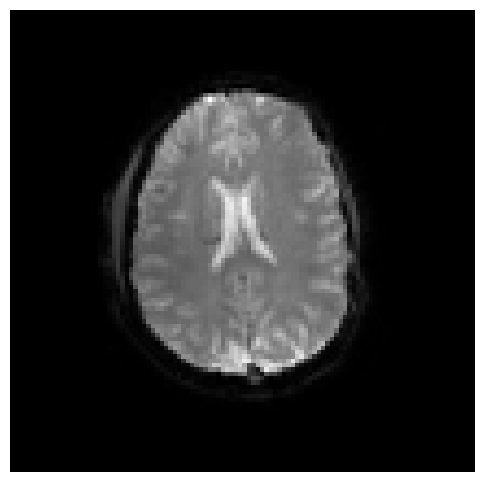

In [93]:
im7lr = image.mean_img(bids_folder / 'sub-philips' / 'ses-1' / 'func' / 'sub-philips_ses-1_task-task_run-1_bold.nii')
im8rl = image.mean_img(bids_folder / 'sub-philips' / 'ses-1' / 'func' / 'sub-philips_ses-1_task-task_run-2_bold.nii')
animate_nifti_switch(image.mean_img(im7lr), image.mean_img(im8rl), slice_idx=0, fps=2, interval=500, output_path='philips.mp4')


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/1808923261.py:1: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  im1 = image.mean_img(bids_folder1 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-LR_run-01_space-T1w_boldref.nii.gz')
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/1808923261.py:2: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  im2 = image.mean_img(bids_folder1 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestima

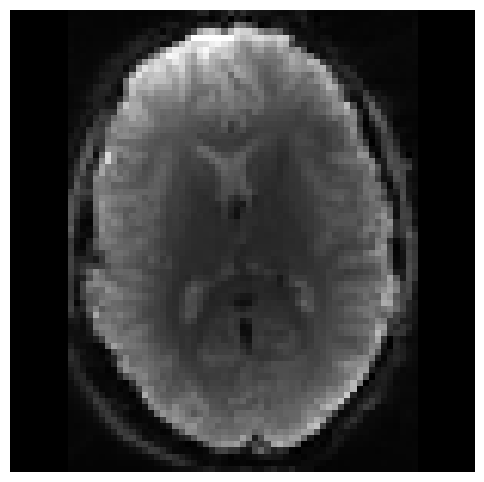

In [114]:
im1 = image.mean_img(bids_folder1 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-LR_run-01_space-T1w_boldref.nii.gz')
im2 = image.mean_img(bids_folder1 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-RL_run-04_space-T1w_boldref.nii.gz')
animate_nifti_switch(im1, im2, slice_idx=0, fps=2, interval=500, output_path='fmap.mp4')


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/1293104015.py:1: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  im1 = image.mean_img(bids_folder2 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-LR_run-01_space-T1w_boldref.nii.gz')
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/1293104015.py:2: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  im2 = image.mean_img(bids_folder2 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestima

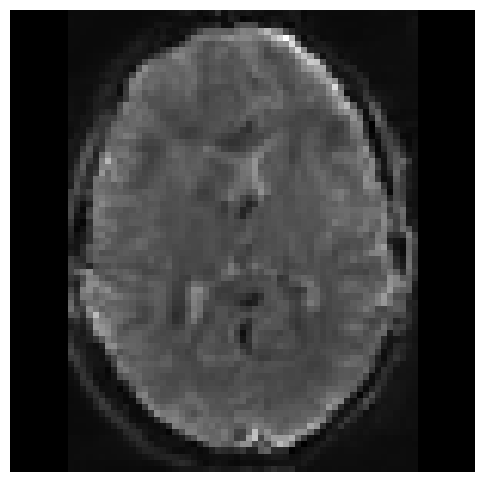

In [102]:
im1 = image.mean_img(bids_folder2 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-LR_run-01_space-T1w_boldref.nii.gz')
im2 = image.mean_img(bids_folder2 / 'derivatives' / 'fmriprep' / 'sub-alina' / 'ses-1' / 'func' / 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-RL_run-04_space-T1w_boldref.nii.gz')
animate_nifti_switch(im1, im2, slice_idx=0, fps=2, interval=500, output_path='topup.mp4')


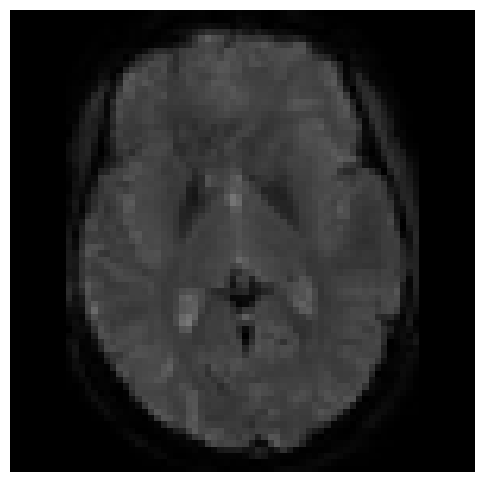

In [113]:
im1 = '/Users/gdehol/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-1_space-T1w_boldref.nii.gz'
im2 = '/Users/gdehol/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/func/sub-alina_ses-1_task-task_run-2_space-T1w_boldref.nii.gz'
animate_nifti_switch(im1, im2, fps=2, interval=500, output_path='topup_philips.mp4', vmax=3200, slice_idx=[20])


In [107]:
!ls /Users/gdehol/data/ds-neuralpriors/derivatives/fmriprep/sub-alina/ses-1/

anat fmap func


In [134]:
df['bids_name'].tolist()

['sub-alina_ses-1_task-numestimate_acq-mb0_dir-LR_run-01_bold',
 'sub-alina_ses-1_task-numestimate_acq-mb0_dir-RL_run-04_bold',
 'sub-alina_ses-1_task-numestimate_acq-mb2_dir-LR_run-02_bold',
 'sub-alina_ses-1_task-numestimate_acq-mb2_dir-RL_run-05_bold',
 'sub-alina_ses-1_task-numestimate_acq-mb4_dir-LR_run-03_bold',
 'sub-alina_ses-1_task-numestimate_acq-mb4_dir-RL_run-06_bold',
 'sub-alina_ses-2_task-numestimate_acq-mb0_dir-LR_run-03_bold',
 'sub-alina_ses-2_task-numestimate_acq-mb0_dir-RL_run-06_bold',
 'sub-alina_ses-2_task-numestimate_acq-mb2_dir-LR_run-02_bold',
 'sub-alina_ses-2_task-numestimate_acq-mb2_dir-RL_run-05_bold',
 'sub-alina_ses-2_task-numestimate_acq-mb4_dir-LR_run-01_bold',
 'sub-alina_ses-2_task-numestimate_acq-mb4_dir-RL_run-04_bold',
 'sub-alina_ses-3_task-numestimate_acq-mb0_dir-LR_run-02_bold',
 'sub-alina_ses-3_task-numestimate_acq-mb0_dir-RL_run-05_bold',
 'sub-alina_ses-3_task-numestimate_acq-mb2_dir-LR_run-01_bold',
 'sub-alina_ses-3_task-numestimate_acq-m

In [158]:
import pandas as pd
import re
import seaborn as sns

# Regular expression
pattern = re.compile(r"sub-([^_]+).*?acq-mb(\d+)")


# Function to extract subject and multiband factor
def extract_info(bids_name):
    match = pattern.search(bids_name)
    if match:
        subject = match.group(1)
        mb_factor = match.group(2) if match.group(2) else "No MB"  # If missing, set as "No MB"
        return pd.Series([subject, mb_factor])
    return pd.Series([None, None])

df = pd.read_csv('/data/ds-siemenspilots/derivatives/mriqc/group_bold.tsv', sep='\t')

# Apply function to DataFrame
df[['subject', 'mb_factor']] = df['bids_name'].apply(extract_info)
df['scanner'] = df['subject'].map({None:'Philips', 'alina':'Siemens'})

In [159]:
df

,bids_name,aor,aqi,dummy_trs,dvars_nstd,dvars_std,dvars_vstd,efc,fber,fd_mean,...,summary_fg_mean,summary_fg_median,summary_fg_n,summary_fg_p05,summary_fg_p95,summary_fg_stdv,tsnr,subject,mb_factor,scanner
0,sub-alina_ses-1_task-numestimate_acq-mb0_dir-L...,0.002097,0.002976,1,30.883834,1.359085,1.107578,0.5732,211.4799,0.114516,...,394.6812,351.0,72315.0,139.0,800.0,208.0328,70.676684,alina,0,Siemens
1,sub-alina_ses-1_task-numestimate_acq-mb0_dir-R...,0.002024,0.001968,0,31.692626,1.561618,1.508809,0.5794,201.3608,0.079879,...,389.7496,347.0,73200.0,134.0,789.0,205.2339,84.266245,alina,0,Siemens
2,sub-alina_ses-1_task-numestimate_acq-mb2_dir-L...,0.001346,0.002393,0,29.133110,1.269817,1.079647,0.5681,348.0690,0.166140,...,309.0886,284.0,73246.0,101.0,594.0,151.7578,66.787322,alina,2,Siemens
3,sub-alina_ses-1_task-numestimate_acq-mb2_dir-R...,0.000890,0.001995,0,25.904184,1.199899,1.052540,0.5678,339.4171,0.152726,...,314.5487,289.0,72241.0,107.0,605.0,154.2637,71.922971,alina,2,Siemens
4,sub-alina_ses-1_task-numestimate_acq-mb4_dir-L...,0.001136,0.002676,1,28.915525,1.157414,1.096804,0.5637,478.1935,0.135539,...,227.0139,212.0,72804.0,76.0,426.0,108.2251,54.193158,alina,4,Siemens
5,sub-alina_ses-1_task-numestimate_acq-mb4_dir-R...,0.001596,0.002760,2,31.615364,1.268044,1.245005,0.5710,435.1424,0.108487,...,222.3957,209.0,73815.0,69.0,417.0,106.9045,52.728419,alina,4,Siemens
6,sub-alina_ses-2_task-numestimate_acq-mb0_dir-L...,0.001974,0.004595,0,34.208642,1.571654,1.033847,0.5790,194.3130,0.081101,...,381.2310,340.0,76071.0,126.0,779.0,204.4254,83.823184,alina,0,Siemens
7,sub-alina_ses-2_task-numestimate_acq-mb0_dir-R...,0.001247,0.003441,0,45.332531,2.143991,1.262502,0.5819,190.8183,0.084038,...,381.9531,339.0,75463.0,128.0,778.0,204.0903,82.701852,alina,0,Siemens
8,sub-alina_ses-2_task-numestimate_acq-mb2_dir-L...,0.000990,0.001907,1,29.086212,1.333322,1.140184,0.5751,328.8942,0.119834,...,304.9401,279.0,75301.0,100.0,590.0,151.6353,72.433684,alina,2,Siemens
9,sub-alina_ses-2_task-numestimate_acq-mb2_dir-R...,0.000832,0.002775,1,26.985296,1.266162,1.105986,0.5750,326.9917,0.123140,...,304.6185,280.0,74966.0,101.0,585.0,149.8191,73.124347,alina,2,Siemens


In [161]:
df.columns

Index(['bids_name', 'aor', 'aqi', 'dummy_trs', 'dvars_nstd', 'dvars_std',
       'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg',
       'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y', 'size_t',
       'size_x', 'size_y', 'size_z', 'snr', 'spacing_tr', 'spacing_x',
       'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k',
       'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median',
       'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv',
       'tsnr', 'subject', 'mb_factor', 'scanner', 'label'],
      dtype='object')

Text(0.5, 0.98, 'Smoothness')

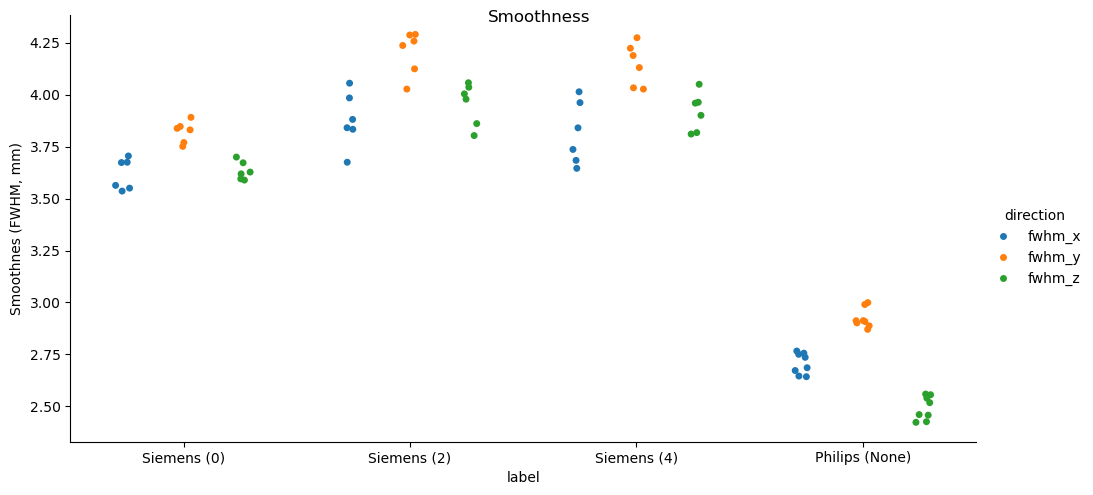

In [175]:
tmp = df.set_index('label')[['fwhm_x', 'fwhm_y', 'fwhm_z']].stack().to_frame('Smoothnes (FWHM, mm)')

tmp.index.set_names(['label', 'direction'], inplace=True)

g = sns.catplot(data=tmp.reset_index(), x='label', y='Smoothnes (FWHM, mm)', hue='direction', aspect=2., dodge=True)

g.fig.suptitle('Smoothness')

In [ ]:
tmp = df.set_index('label')[['fwhm_x', 'fwhm_y', 'fwhm_z']].stack().to_frame('Smoothnes (FWHM, mm)')

tmp.index.set_names(['label', 'direction'], inplace=True)

sns.catplot(data=tmp.reset_index(), x='label', y='Smoothnes (FWHM, mm)', hue='direction', aspect=2., dodge=True)

Text(0.5, 0.98, 'tSNR')

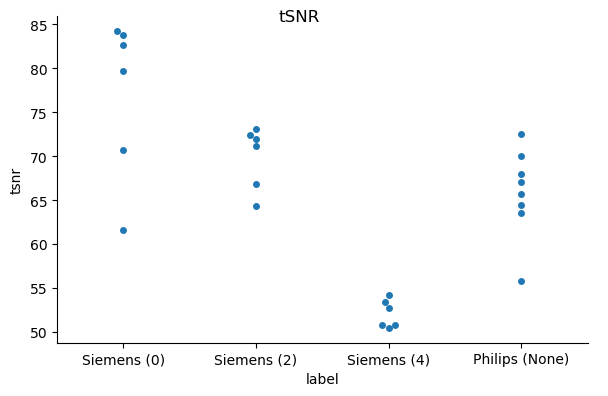

In [174]:
df['label'] = df.apply(lambda row: f'{row["scanner"]} ({row["mb_factor"]})', axis=1)


g = sns.catplot(data=df, x='label', y='tsnr', kind='swarm', aspect=1.5, height=4.)
g.fig.suptitle('tSNR')

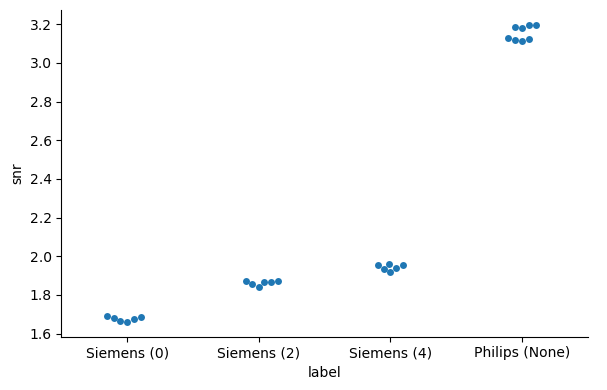

In [186]:
g = sns.catplot(data=df, x='label', y='snr', kind='swarm', aspect=1.5, height=4.)
# g.fig.suptitle('tSNR')

In [187]:
from siemens_pilots.utils.data import Subject

In [192]:
brain_masker = Subject('alina', bids_folder='/data/ds-siemenspilotsfmap').get_brain_mask()

In [193]:
def get_r2(mb, smoothed, ds='siemenspilotsfmap'):

    bids_folder = Path(f'/data/ds-{ds}')

    glm_key = 'glm_stim1.denoise'

    if smoothed:
        glm_key += '.smoothed'

    fn = bids_folder / 'derivatives' / glm_key / f'sub-alina' / 'func' / f'sub-alina_task-task_space-T1w_acq-mb{mb}_desc-R2_pe.nii.gz'

    return image.load_img(fn)


In [224]:
from itertools import product

keys = []
r2 = []

for mb, smoothed in product([0, 2, 4], [True, False]):
    r2.append(pd.Series(brain_masker.fit_transform(get_r2(mb, smoothed)).ravel(), name='r2'))
    keys.append((mb, 'Smoothed' if  smoothed else 'Unsmoothed'))

r2 = pd.concat(r2, axis=1, keys=keys, names=['mb', 'smoothed'])
r2 = r2.stack().stack().to_frame('r2')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45954/3443908259.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  r2 = r2.stack().stack().to_frame('r2')


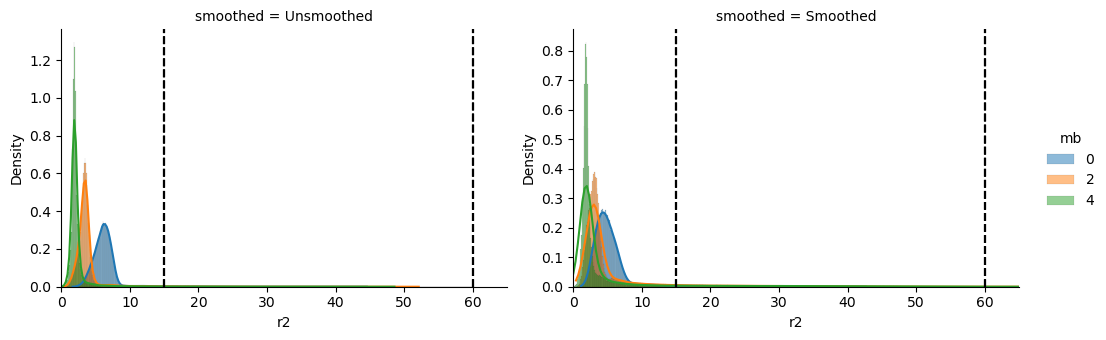

In [235]:
g = sns.FacetGrid(r2.reset_index(), hue='mb', col='smoothed', sharex=False, sharey=False, height=3.5, aspect=1.5, col_order=['Unsmoothed', 'Smoothed'])
g.map(sns.histplot, 'r2', bins=np.arange(0, 60, .1), kde=True, stat='density')
g.add_legend()

g.map(plt.axvline, x=15, c='k', ls='--')
g.map(plt.axvline, x=60, c='k', ls='--')
# g.map(plt.axhline, y=.8, c='k', ls='--')

g.set(xlim=(0, 65))

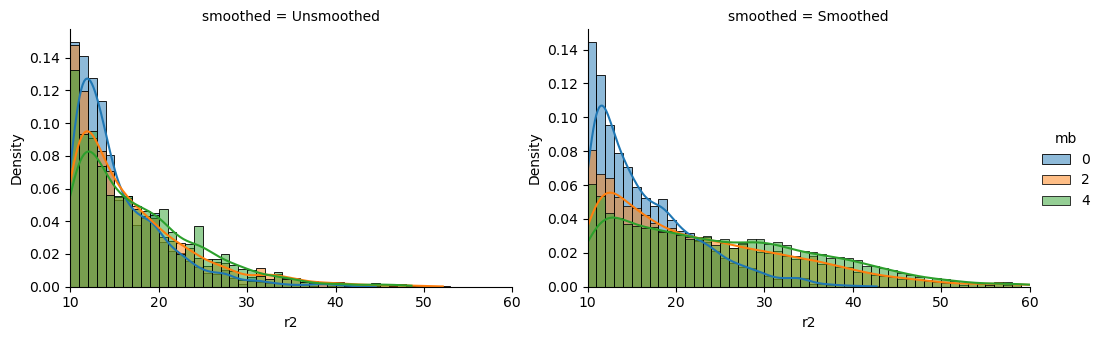

In [237]:
g = sns.FacetGrid(r2[r2 > 10].reset_index(), hue='mb', col='smoothed', sharex=False, sharey=False, height=3.5, aspect=1.5, col_order=['Unsmoothed', 'Smoothed'])
g.map(sns.histplot, 'r2', bins=np.arange(10, 60, 1.), kde=True, stat='density')
g.add_legend()

g.set(xlim=(10, 60))

Text(0.5, 1.05, 'Pairplot of R2 values for different multiband factors (smoothed)')

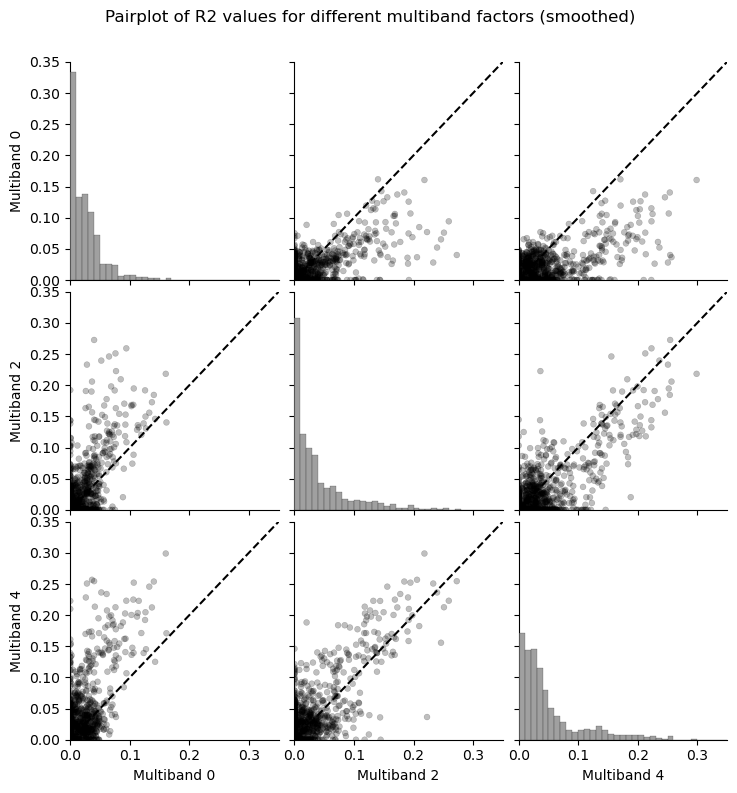

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from siemens_pilots.utils.data import Subject

sub = Subject('alina', '/data/ds-siemenspilotsfmap')

prf_pars = []
for multiband in [0, 2, 4]:
    prf_pars.append(sub.get_prf_parameters_volume(multiband, return_image=False, roi='NPCr', smoothed=True),)

prf_pars = pd.concat(prf_pars, keys=[0, 2, 4], names=['multiband'])

# Ensure r2 is properly formatted
r2 = prf_pars['r2'].unstack('multiband').droplevel(0, axis=1)

# Create the pairplot
g = sns.pairplot(r2, plot_kws={'alpha': 0.25, 'color':'k', 'edgecolor': None, 'size':1.}, diag_kws={'bins': np.arange(0, 1, .01), 'color':'gray'})

# Determine the global limits
global_min = 0.0
global_max = 0.35


# Set consistent axis limits
for ax in g.axes.flat:
    if ax is not None:
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(global_min, global_max)

# Define a function to plot identity lines
def identity_line(*args, **kwargs):
    ax = plt.gca()
    ax.plot([global_min, global_max], [global_min, global_max], ls="--", c="k")

# Apply to off-diagonal plots
g.map_offdiag(identity_line)

# Set xlabel and ylabel for each variable
new_labels = [f"Multiband {col}" for col in r2.columns]

for ax, label in zip(g.axes[-1, :], new_labels):  # Bottom row -> x-axis labels
    ax.set_xlabel(label)

for ax, label in zip(g.axes[:, 0], new_labels):  # Leftmost column -> y-axis labels
    ax.set_ylabel(label)

g.fig.suptitle("Pairplot of R2 values for different multiband factors (smoothed)", y=1.05)


/Users/gdehol/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 1.05, 'Pairplot of R2 values for different multiband factors (unsmoothed)')

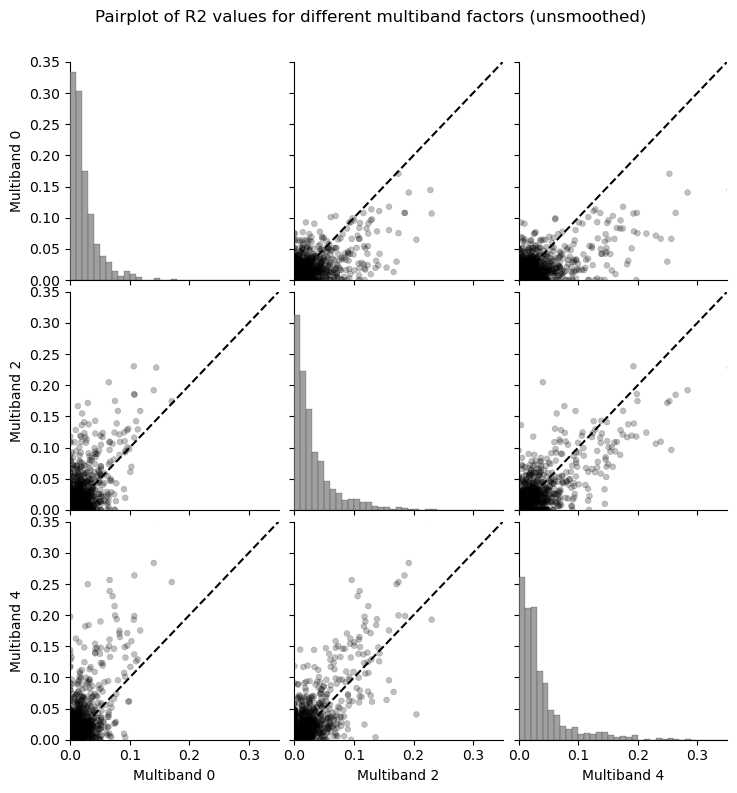

In [2]:
import pandas as pd
from siemens_pilots.utils.data import Subject
import seaborn as sns
sub = Subject('alina', '/data/ds-siemenspilotsfmap')


prf_pars = []
for multiband in [0, 2, 4]:
    prf_pars.append(sub.get_prf_parameters_volume(multiband, return_image=False, roi='NPCr', smoothed=False),)

prf_pars = pd.concat(prf_pars, keys=[0, 2, 4], names=['multiband'])

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure r2 is properly formatted
r2 = prf_pars['r2'].unstack('multiband').droplevel(0, axis=1)

# Create the pairplot
g = sns.pairplot(r2, plot_kws={'alpha': 0.25, 'color':'k', 'edgecolor': None, 'size':1.}, diag_kws={'bins': np.arange(0, 1, .01), 'color':'gray'})
# Determine the global limits
global_min = 0.0
global_max = 0.35

# Set consistent axis limits
for ax in g.axes.flat:
    if ax is not None:
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(global_min, global_max)

# Define a function to plot identity lines
def identity_line(*args, **kwargs):
    ax = plt.gca()
    ax.plot([global_min, global_max], [global_min, global_max], ls="--", c="k")

# Apply to off-diagonal plots
g.map_offdiag(identity_line)

# Set xlabel and ylabel for each variable
new_labels = [f"Multiband {col}" for col in r2.columns]

for ax, label in zip(g.axes[-1, :], new_labels):  # Bottom row -> x-axis labels
    ax.set_xlabel(label)

for ax, label in zip(g.axes[:, 0], new_labels):  # Leftmost column -> y-axis labels
    ax.set_ylabel(label)

g.fig.suptitle("Pairplot of R2 values for different multiband factors (unsmoothed)", y=1.05)


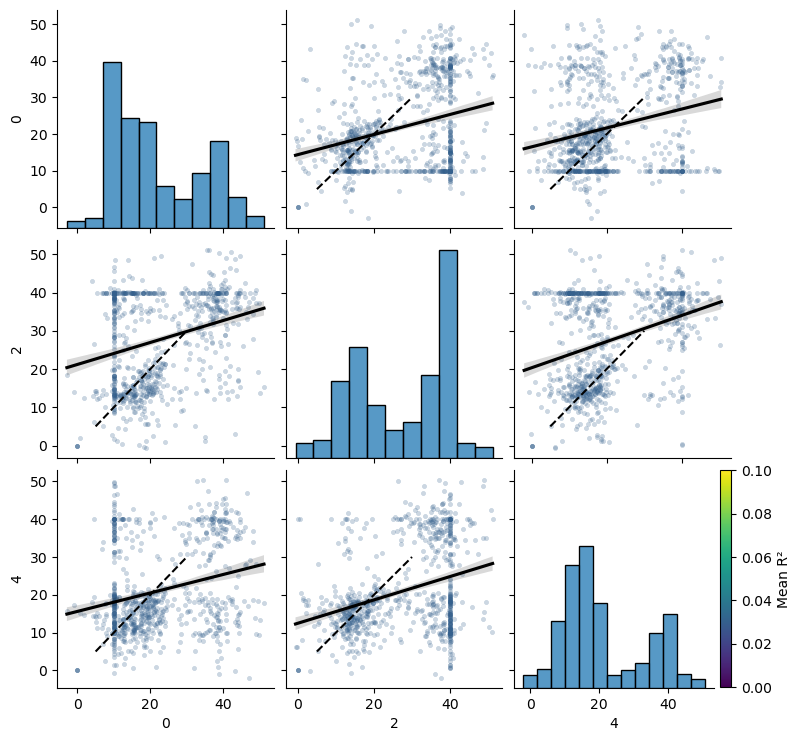

In [52]:
mean_r2 = prf_pars[('r2', None)].unstack('multiband').mean(1)
mean_r2.name = 'mean_r2'
tmp = prf_pars[('mu', 'wide')].unstack('multiband').join(mean_r2)
tmp1 = tmp.copy()

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define vmin and vmax for normalization
vmin, vmax = tmp['mean_r2'].min(), 0.1

# Normalize mean_r2 values
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap("viridis")  # Choose a colormap

# Convert mean_r2 values to colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Color mapping object
tmp['color'] = tmp['mean_r2'].apply(lambda x: mcolors.to_hex(sm.to_rgba(x)))

# Select columns for pairplot (EXCLUDING mean_r2)
columns_to_plot = [col for col in tmp.columns if col not in ['mean_r2', 'color']]

# Create pairplot WITHOUT mean_r2 in axes
g = sns.pairplot(tmp[columns_to_plot], plot_kws={'alpha': 0.25, 's': 10}, diag_kind='hist')

# Manually color the points based on mean_r2
for ax in g.axes.flatten():
    if ax is not None:
        for artist, color in zip(ax.collections, tmp['color']):
            artist.set_color(color)

# Remove the automatic legend (if it exists)
# if g.fig.legend_ is not None:
#     g.fig.legend_.remove()

# Add a colorbar for mean_r2
cbar = plt.colorbar(sm, ax=g.fig.axes[-1], fraction=0.05, pad=0.03)
cbar.set_label('Mean R²')

def identity_line(*args, **kwargs):
    ax = plt.gca()
    ax.plot([5, 30], [5, 30], ls="--", c="k")

# Apply to off-diagonal plots
g.map_offdiag(identity_line)
g.map_offdiag(sns.regplot, scatter=False, color='k')

plt.show()


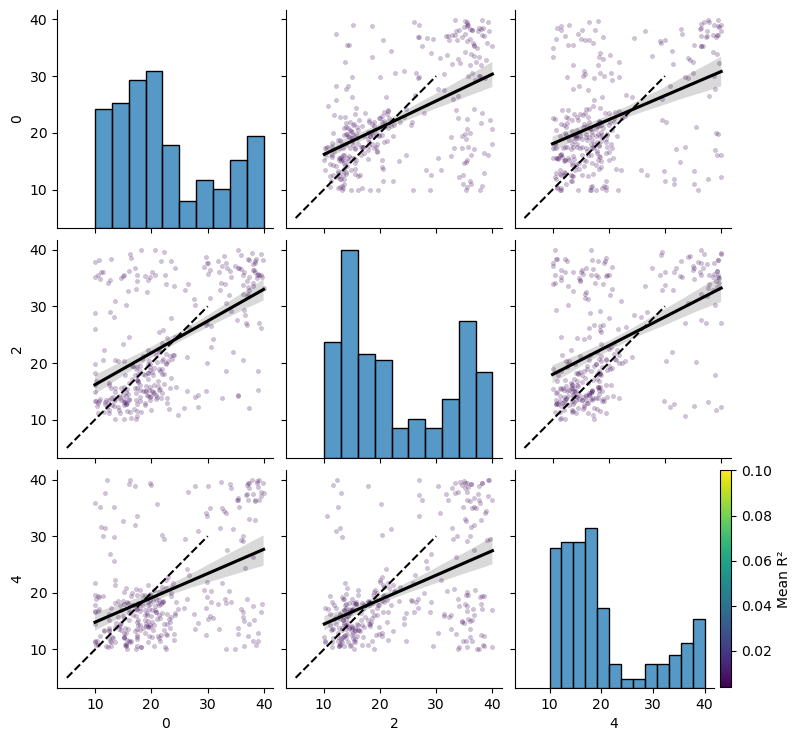

In [53]:
mean_r2 = prf_pars[('r2', None)].unstack('multiband').mean(1)
mean_r2.name = 'mean_r2'
tmp = prf_pars[('mu', 'wide')].unstack('multiband')
tmp = tmp[tmp.gt(10).all(1) & tmp.lt(40).all(1)]
tmp = tmp.join(mean_r2)
tmp2 = tmp.copy()

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define vmin and vmax for normalization
vmin, vmax = tmp['mean_r2'].min(), 0.1

# Normalize mean_r2 values
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap("viridis")  # Choose a colormap

# Convert mean_r2 values to colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Color mapping object
tmp['color'] = tmp['mean_r2'].apply(lambda x: mcolors.to_hex(sm.to_rgba(x)))

# Select columns for pairplot (EXCLUDING mean_r2)
columns_to_plot = [col for col in tmp.columns if col not in ['mean_r2', 'color']]

# Create pairplot WITHOUT mean_r2 in axes
g = sns.pairplot(tmp[columns_to_plot], plot_kws={'alpha': 0.25, 's': 10}, diag_kind='hist')

# Manually color the points based on mean_r2
for ax in g.axes.flatten():
    if ax is not None:
        for artist, color in zip(ax.collections, tmp['color']):
            artist.set_color(color)

# Remove the automatic legend (if it exists)
# if g.fig.legend_ is not None:
#     g.fig.legend_.remove()

# Add a colorbar for mean_r2
cbar = plt.colorbar(sm, ax=g.fig.axes[-1], fraction=0.05, pad=0.03)
cbar.set_label('Mean R²')

def identity_line(*args, **kwargs):
    ax = plt.gca()
    ax.plot([5, 30], [5, 30], ls="--", c="k")

# Apply to off-diagonal plots
g.map_offdiag(identity_line)
g.map_offdiag(sns.regplot, scatter=False, color='k')

plt.show()


In [59]:
tmp1[[0,2,4]].corr()

,0,2,4
0,1.000000,0.280395,0.251130
2,0.280395,1.000000,0.325075
4,0.251130,0.325075,1.000000


In [60]:
tmp2[[0,2,4]].corr()

,0,2,4
0,1.000000,0.515031,0.426860
2,0.515031,1.000000,0.468792
4,0.426860,0.468792,1.000000


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_74808/3709171322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp1['mean_r2'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_74808/3709171322.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp2['mean_r2'])


<Axes: xlabel='mean_r2', ylabel='Density'>

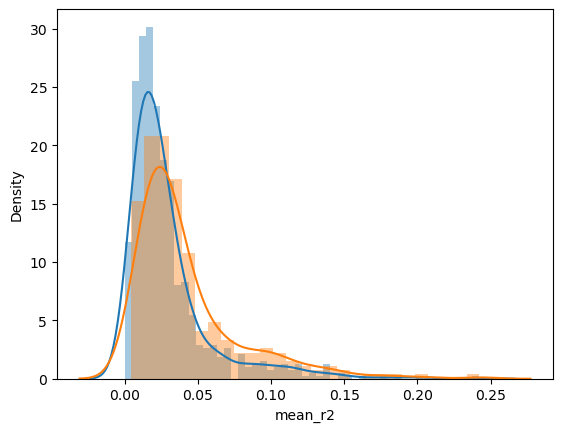

In [54]:
sns.distplot(tmp1['mean_r2'])
sns.distplot(tmp2['mean_r2'])

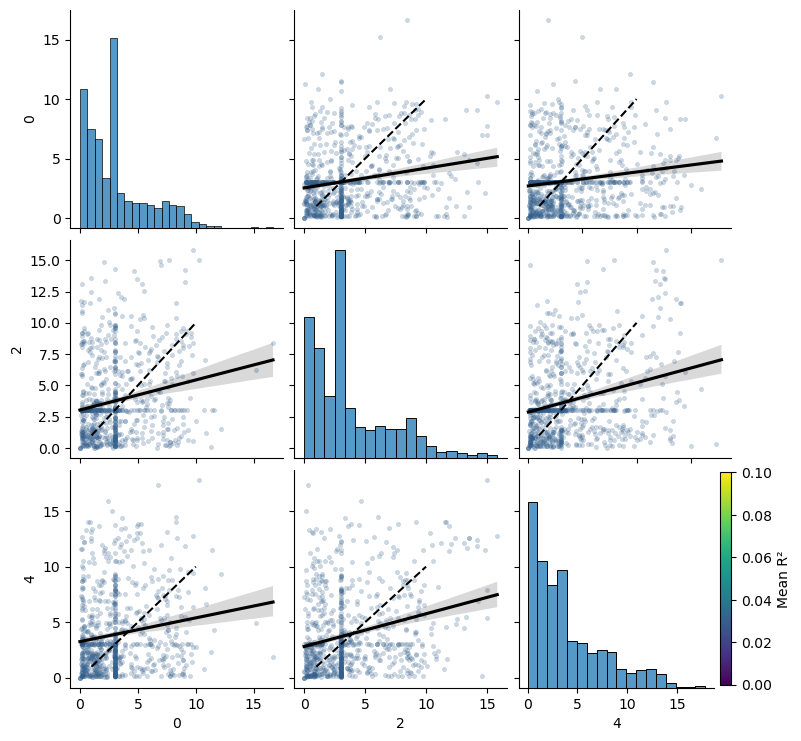

In [63]:
mean_r2 = prf_pars[('r2', None)].unstack('multiband').mean(1)
mean_r2.name = 'mean_r2'
tmp = prf_pars[('sd', 'narrow')].unstack('multiband').join(mean_r2)
tmp1 = tmp.copy()

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define vmin and vmax for normalization
vmin, vmax = tmp['mean_r2'].min(), 0.1

# Normalize mean_r2 values
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap("viridis")  # Choose a colormap

# Convert mean_r2 values to colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Color mapping object
tmp['color'] = tmp['mean_r2'].apply(lambda x: mcolors.to_hex(sm.to_rgba(x)))

# Select columns for pairplot (EXCLUDING mean_r2)
columns_to_plot = [col for col in tmp.columns if col not in ['mean_r2', 'color']]

# Create pairplot WITHOUT mean_r2 in axes
g = sns.pairplot(tmp[columns_to_plot], plot_kws={'alpha': 0.25, 's': 10}, diag_kind='hist')

# Manually color the points based on mean_r2
for ax in g.axes.flatten():
    if ax is not None:
        for artist, color in zip(ax.collections, tmp['color']):
            artist.set_color(color)

# Remove the automatic legend (if it exists)
# if g.fig.legend_ is not None:
#     g.fig.legend_.remove()

# Add a colorbar for mean_r2
cbar = plt.colorbar(sm, ax=g.fig.axes[-1], fraction=0.05, pad=0.03)
cbar.set_label('Mean R²')

def identity_line(*args, **kwargs):
    ax = plt.gca()
    ax.plot([1, 10], [1, 10], ls="--", c="k")

# Apply to off-diagonal plots
g.map_offdiag(identity_line)
g.map_offdiag(sns.regplot, scatter=False, color='k')

plt.show()


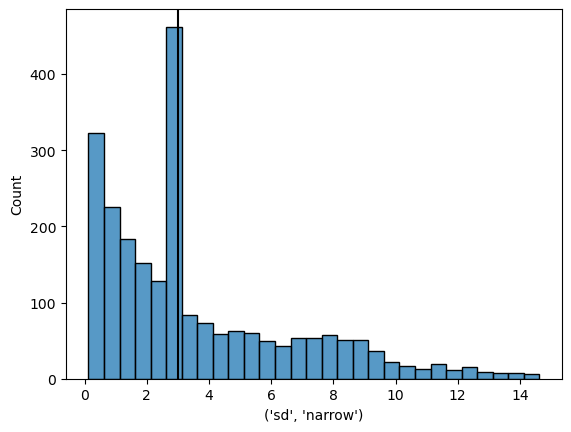

In [71]:
sns.histplot(prf_pars[('sd', 'narrow')], bins=np.arange(.125, 15, .5))
plt.axvline(3, c='k')

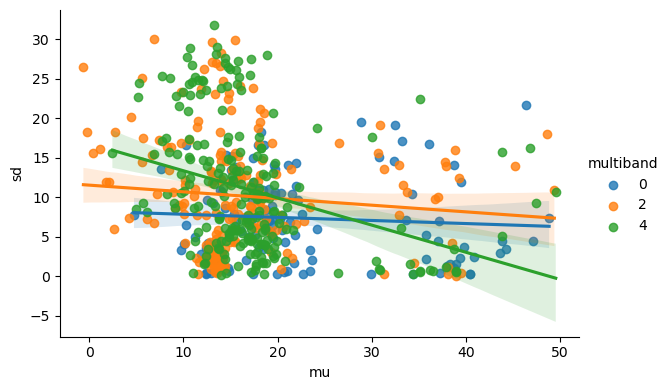

In [82]:
tmp = prf_pars[[('sd', 'wide'), ('mu', 'wide'), ('r2', None)]].droplevel(1, 1)

tmp = tmp[tmp['r2'] > 0.04]

sns.lmplot(data=tmp.reset_index(), x='mu', y='sd', hue='multiband', aspect=1.5, height=4.)

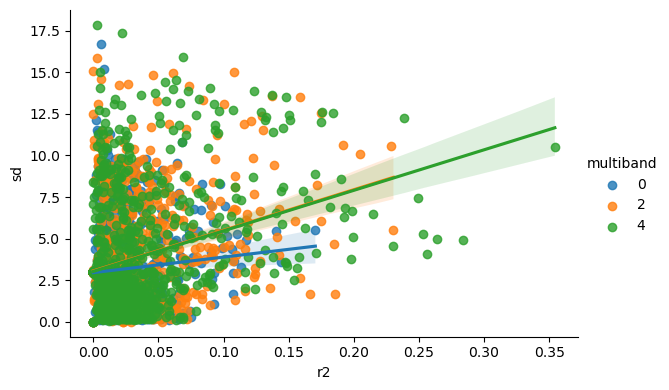

In [78]:
tmp = prf_pars[[('sd', 'narrow'), ('r2', None)]].droplevel(1, 1)

sns.lmplot(data=tmp.reset_index(), x='r2', y='sd', hue='multiband', aspect=1.5, height=4.)